In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# pip install geopandas

In [8]:
import geopandas as gpd
from shapely.geometry import Point
from geopandas import GeoDataFrame

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder, OneHotEncoder
from sklearn.svm import LinearSVC, SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

In [5]:
data = pd.read_csv('/Users/lindag/Downloads/train.csv.zip')
data.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541


In [6]:
# Drop duplicates
data.duplicated().sum()
data.drop_duplicates(keep='first', inplace=True)

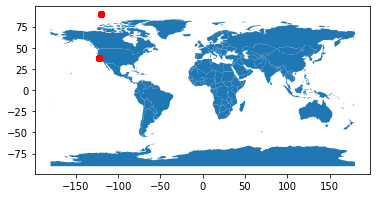

In [9]:
# Check outliers
geometry = [Point(xy) for xy in zip(data['X'], data['Y'])]
gdf = GeoDataFrame(data, geometry=geometry)

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.plot(ax=world.plot(), marker='o', color='red')
plt.show()

In [10]:
# Check mislabled data
data[(data.X > -122) | (data.X < -123) | (data.Y > 38) | (data.Y < 37)].count()[0]
data = data.drop(data[(data.X > -122) | (data.X < -123) | (data.Y > 38) | 
                            (data.Y < 37)].index)

In [12]:
# Parse 'Dates'
dates = pd.to_datetime(data["Dates"])
data["Year"] = dates.dt.year
data["Month"] = dates.dt.month
data["Day"] = dates.dt.day
data["Hour"] = dates.dt.hour
data.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,geometry,Year,Month,Day,Hour
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,POINT (-122.42589 37.77460),2015,5,13,23
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,POINT (-122.42589 37.77460),2015,5,13,23
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414,POINT (-122.42436 37.80041),2015,5,13,23
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873,POINT (-122.42700 37.80087),2015,5,13,23
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541,POINT (-122.43874 37.77154),2015,5,13,23


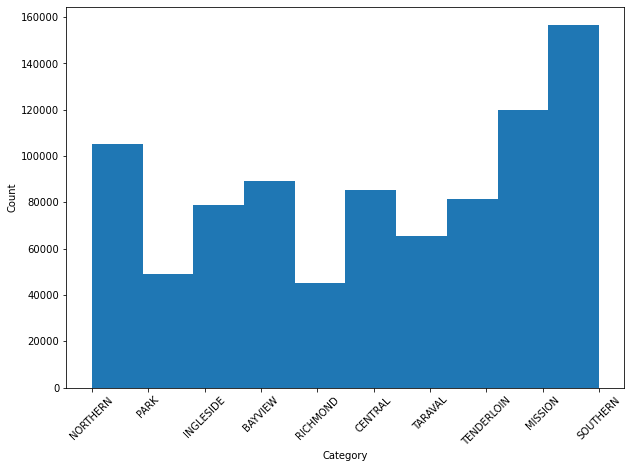

In [19]:
# Histogram count for PdDistrict Cateogry
fig = plt.figure(figsize =(10, 7))
plt.hist(data['PdDistrict'])
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation = 45)

plt.show()

<AxesSubplot:xlabel='Resolution'>

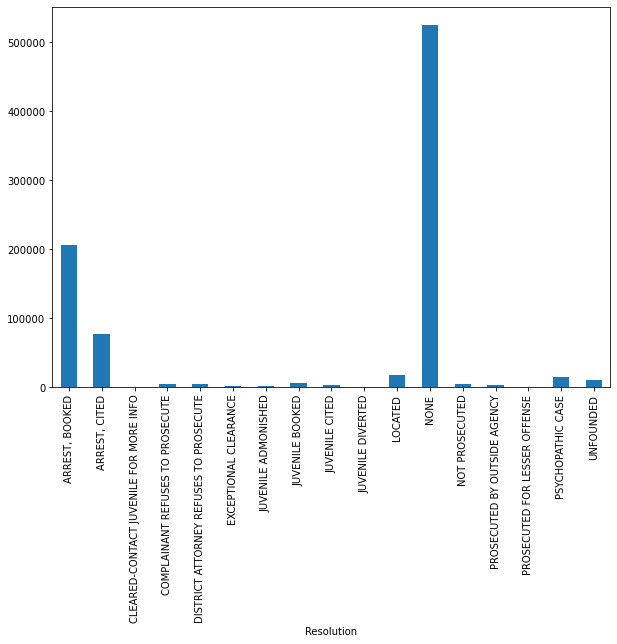

In [31]:
# Most common Resolution
fig = plt.figure(figsize =(10, 7))

resolutions = data.groupby(["Resolution"])["Resolution"].count().plot(kind='bar')
resolutions

In [ ]:
# Numerical columns: 'X', 'Y'

In [ ]:
# Categorical columns: 'DayOfWeek', 'PdDistrict', 'Resolution'